### Demension Reduction & Clustering

차원축소와 군집화 알고리즘의 종류에 대해서 Touring하고 전통적 자산배분을 잇는 역분산 포트폴리오에 대해서 소개한다

#### 1. Principal Component Analysis

PCA(Principle Component Analysis)는 관측당 많은 수의 차원/특징을 포함하는 데이터를 분석하고, 최대의 정보량을 보존하면서 데이터의 해석성을 올리는 통계학적 방법이다. 경제학에서는 계량경제학 분야에서 Fector Modeling을 구현할 때 주로 사용하였으며, 고전적인 방법에서부터 파생되었기 때문에 statsmodels와 sklearn모두 PCA를 구현하도록 되어 있다. 다만, 사용 목적에 따라서 쓰임새가 달라진다

**statsmodels**

```
statsmodels.multivariate.pca.PCA(data, ncomp=None, standardize=True, demean=True, 
                                 normalize=True, gls=False, weights=None, method='svd', 
                                 missing=None, tol=5e-08, max_iter=1000, tol_em=5e-08, 
                                 max_em_iter=100, svd_full_matrices=False)
```

**sklearn**

```
sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', 
                          tol=0.0, iterated_power='auto', n_oversamples=10, 
                          power_iteration_normalizer='auto', random_state=None)
```

**1.1 First component**

PCA는 데이터의 projection에 의해 계산된 가장 큰 분산을 만드는 좌표계를 첫번째 주성분으로, 두번째로 큰 분산을 만들도록 하는 좌표계를 두번째 주성분으로 만들게 하는 Orthogonal Linear Transformation으로 정의된다. $n\times p$인 matrix $\mathbf{x}$가 있다고 하자. 여기서 n개의 열은 관측치를 나타내고 p개의 행은 feature의 개수로 가정한다 (일반적인 Feature Matrix라고 생각하면 된다)

수학적으로, Transformation은 $\mathbf{x}$의 각 행 벡터 $\mathbf{x}_{(i)}$를 주성분 점수 ${\displaystyle \mathbf {t}_{(i)}=(t_{1}} \dots,t_{l})_{(i)}$의 새로운 벡터에 매핑하는 가중치 또는 계수 $\mathbf{w}_{(k)}_{(i)}$의 크기 $l$로 정의된다

$${\displaystyle {t_{k}}_{(i)}=\mathbf{{x}_{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,l}$$

데이터의 분산을 가장 크게 만드는 첫 번째 주성분 좌표계를 구하기 위한 가중치 벡터 $\mathbf{w}_{(1)}$은 다음을 만족한다

$${\displaystyle \mathbf {w} _{(1)}=\arg \max _{\Vert \mathbf {w} \Vert =1}\,\left\{\sum _{i}(t_{1})_{(i)}^{2}\right\}=\arg \max _{\Vert \mathbf {w} \Vert =1}\,\left\{\sum _{i}\left(\mathbf {x} _{(i)}\cdot \mathbf {w} \right)^{2}\right\}}$$

위 식은 아래와 같이 다시 쓸 수 있다

$${\displaystyle \mathbf {w} _{(1)}=\arg \max _{\left\|\mathbf {w} \right\|=1}\left\{\left\|\mathbf {Xw} \right\|^{2}\right\}=\arg \max _{\left\|\mathbf {w} \right\|=1}\left\{\mathbf {w} ^{\mathsf {T}}\mathbf {X} ^{\mathsf {T}}\mathbf {Xw} \right\}}$$

$\mathbf{w}_{(1)}$은 unit vector로 정의되기 때문에, 아래를 만족한다

$${\displaystyle \mathbf {w} _{(1)}=\arg \max \left\{{\frac {\mathbf {w} ^{\mathsf {T}}\mathbf {X} ^{\mathsf {T}}\mathbf {Xw} }{\mathbf {w} ^{\mathsf {T}}\mathbf {w} }}\right\}}$$

최대화하고자 하는 양은 Rayleigh quotient으로 인식될 수 있다. $\mathbf{X}^{\mathsf {T}}\mathbf{X}$와 같은 양의 반정의 행렬에 대한 표준 결과는 가능한 몫의 최대치가 행렬의 가장 큰 고유값이며, 이는 w가 대응하는 고유 벡터일 때 발생한다

**1.2 Further components**

k번째 주성분은 $\mathbf{x}$에서 첫번째 k-1 주성분을 빼면 알 수 있다

$${\displaystyle \mathbf {\hat {X}} _{k}=\mathbf {X} -\sum _{s=1}^{k-1}\mathbf {X} \mathbf {w} _{(s)}\mathbf {w} _{(s)}^{\mathsf {T}}}$$

새롭게 도출된 matrix에서 variance를 가장 크게 하는 가중치 벡터 $\mathbf{w}$를 찾는다

$${\displaystyle \mathbf {w} _{(k)}=\mathop {\operatorname {arg\,max} } _{\left\|\mathbf {w} \right\|=1}\left\{\left\|\mathbf {\hat {X}} _{k}\mathbf {w} \right\|^{2}\right\}=\arg \max \left\{{\tfrac {\mathbf {w} ^{\mathsf {T}}\mathbf {\hat {X}} _{k}^{\mathsf {T}}\mathbf {\hat {X}} _{k}\mathbf {w} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$

이것은 $\mathbf{X}^{\mathsf {T}}\mathbf{X}$의 나머지 고유 벡터에 해당하는 고유값으로 주어진 괄호 안의 양에 대한 최대값을 제공힌디. 따라서 가중치 벡터는 $\mathbf{X}^{\mathsf {T}}\mathbf{X}$의 **eigenvector**이다

따라서 데이터 벡터 $\mathbf{x}^{(i)}$의 k번째 주성분은 변환된 좌표에서 점수 $t_{k(i)} = \mathbf{x}_{(i)} ⋅ \mathbf{w}_{(k)}$로 표시되거나 원래 변수의 공간에서 해당 벡터인 $\mathbf{x}_{(i)} ⋅ \mathbf{w}_{(k)}$로 표시될 수 있습니다. 여기서 $\mathbf{w}_{(k)}$는 $\mathbf{X}^{\mathsf {T}}\mathbf{X}$의 $k$번째 eigenvector이다

따라서 $\mathbf{X}$의 전체 주성분 분해는 다음과 같이 나타낼 수 있다

$$\mathbf{T} = \mathbf{XW}$$

여기서 $\mathbf{W}$는 $\mathbf{X}^{\mathsf {T}}\mathbf{X}$의 eignevector의 $p \times p$ 가중치 행렬이다

#### example 1

준비된 `selected_tickers_info`는 미국 증권시장에 상장된 종목들의 ticker이다. ticker 정보를 이용하여 Principal Components Analysis를 수행해 보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stock_list = pd.read_csv('selected_tickers_info.csv', index_col = 0)
stock_list

,Name,Sector
Symbol,,
ARE,Alexandria Real Estate Equities Inc,Real Estate
ALLE,Allegion,Industrials
AGN,"Allergan, Plc",Health Care
ALL,Allstate Corp,Financials
AME,AMETEK Inc.,Industrials
AIV,Apartment Investment & Management,Real Estate
ADM,Archer-Daniels-Midland Co,Consumer Staples
T,AT&T Inc.,Telecommunication Services
CHRW,C. H. Robinson Worldwide,Industrials


In [2]:
import yfinance as yf
import pandas as pd

stock_data = pd.DataFrame()
for ticker in stock_list.index :
    stock = yf.Ticker(ticker)
    data = stock.history(start = "2015-01-01", end = "2023-11-19")
    stock_data[ticker] = data["Close"]
stock_data.head()

AGN: No timezone found, symbol may be delisted
CTL: No timezone found, symbol may be delisted
DISCK: No timezone found, symbol may be delisted
RE: No timezone found, symbol may be delisted
FLIR: No timezone found, symbol may be delisted
PKI: No timezone found, symbol may be delisted


,ARE,ALLE,AGN,ALL,AME,AIV,ADM,T,CHRW,CTL,...,PRGO,PM,SPGI,SWKS,SLG,SNA,SO,SYF,TPR,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,68.775551,50.326881,NaN,57.858757,49.589401,3.090770,40.545147,12.934328,59.910091,NaN,...,145.194107,51.733036,80.979164,63.218735,78.529861,111.705399,33.152790,24.478453,28.513176,30.295372
2015-01-05 00:00:00-05:00,69.602814,50.226318,NaN,56.711830,48.100418,3.117688,39.142204,12.812123,57.281330,NaN,...,143.695435,51.343544,79.545158,62.192688,78.957054,109.697350,33.011761,24.287476,28.069923,30.043762
2015-01-06 00:00:00-05:00,69.955147,50.144043,NaN,56.670544,47.176865,3.142976,38.370575,12.831218,56.534866,NaN,...,143.425278,51.784119,78.394356,60.209545,79.565529,109.361290,33.407955,23.955338,27.741308,30.346985
2015-01-07 00:00:00-05:00,70.904938,50.829700,NaN,57.602966,47.318230,3.174790,38.947346,12.906036,56.559208,NaN,...,145.821533,52.173611,79.435577,61.201111,80.484703,110.049805,33.777298,24.245958,28.597246,30.151146
2015-01-08 00:00:00-05:00,71.716843,51.515339,NaN,58.708664,48.486809,3.209051,38.378376,13.034431,59.098728,NaN,...,149.150070,52.958992,80.148003,63.977501,80.879547,112.557823,33.804142,24.893631,29.323259,30.797394


yfinance에 존재하지 않는 티커를 제외하면 총 43개의 종목을 불러올 수 있다

In [3]:
stock_data.dropna(axis = 1, inplace = True)
ret_stock = np.log(stock_data / stock_data.shift(1)).dropna()
ret_stock.head()

,ARE,ALLE,ALL,AME,AIV,ADM,T,CHRW,GLW,COST,...,PRGO,PM,SPGI,SWKS,SLG,SNA,SO,SYF,TPR,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05 00:00:00-05:00,0.011957,-0.002000,-0.020022,-0.030486,0.008672,-0.035215,-0.009493,-0.044870,-0.014005,-0.011434,...,-0.010375,-0.007557,-0.017867,-0.016363,0.005425,-0.018140,-0.004263,-0.007832,-0.015668,-0.008340
2015-01-06 00:00:00-05:00,0.005049,-0.001639,-0.000728,-0.019387,0.008078,-0.019910,0.001489,-0.013117,-0.017338,0.013128,...,-0.001882,0.008544,-0.014573,-0.032407,0.007677,-0.003068,0.011930,-0.013770,-0.011776,0.010042
2015-01-07 00:00:00-05:00,0.013486,0.013581,0.016320,0.002992,0.010071,0.014920,0.005814,0.000430,0.014248,0.017263,...,0.016569,0.007493,0.013194,0.016334,0.011486,0.006276,0.010995,0.012059,0.030388,-0.006474
2015-01-08 00:00:00-05:00,0.011386,0.013399,0.019013,0.024396,0.010734,-0.014716,0.009899,0.043921,0.031763,0.008555,...,0.022569,0.014941,0.008929,0.044366,0.004894,0.022534,0.000794,0.026362,0.025071,0.021207
2015-01-09 00:00:00-05:00,-0.002888,-0.008375,-0.010314,-0.008981,0.005324,-0.008566,-0.002989,-0.010766,-0.001715,-0.015509,...,-0.008331,-0.002656,-0.008583,-0.001619,0.001998,-0.011719,-0.012795,-0.009383,-0.004441,-0.008942


**statsmodels**

statsmodel의 PCA는 공적분 거리를 기준으로 차원 축소를 수행한다

In [4]:
import statsmodels.api as sm

pca_model = sm.PCA(ret_stock, 
                   standardize = True, 
                   demean = True,
                   ncomp = 5)

parameter `ncomp`는 차원 축소할 주성분의 목표치이다. 5로 지정할 경우 component를 5개로 만들도록 축소를 수행한다

In [5]:
print("Principal Ratio : ", pca_model.factors.shape)
print("R Square score : ", pca_model.rsquare)

Principal Ratio :  (2235, 5)
R Square score :  ncomp
0    0.000000
1    0.429608
2    0.495040
3    0.541018
4    0.573767
5    0.599821
Name: rsquare, dtype: float64


In [6]:
pc_scores = pca_model.factors
pc_scores.head()

,comp_0,comp_1,comp_2,comp_3,comp_4
Date,,,,,
2015-01-05 00:00:00-05:00,0.032373,0.031332,0.012387,-0.052456,-0.006234
2015-01-06 00:00:00-05:00,0.013606,0.029700,0.010961,-0.004694,-0.008793
2015-01-07 00:00:00-05:00,-0.014697,0.016421,-0.000205,-0.018166,-0.001326
2015-01-08 00:00:00-05:00,-0.030880,-0.015115,-0.014369,0.016690,0.004502
2015-01-09 00:00:00-05:00,0.014139,-0.004348,0.015591,-0.016563,0.015252


In [7]:
ret_stock.head()

,ARE,ALLE,ALL,AME,AIV,ADM,T,CHRW,GLW,COST,...,PRGO,PM,SPGI,SWKS,SLG,SNA,SO,SYF,TPR,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05 00:00:00-05:00,0.011957,-0.002000,-0.020022,-0.030486,0.008672,-0.035215,-0.009493,-0.044870,-0.014005,-0.011434,...,-0.010375,-0.007557,-0.017867,-0.016363,0.005425,-0.018140,-0.004263,-0.007832,-0.015668,-0.008340
2015-01-06 00:00:00-05:00,0.005049,-0.001639,-0.000728,-0.019387,0.008078,-0.019910,0.001489,-0.013117,-0.017338,0.013128,...,-0.001882,0.008544,-0.014573,-0.032407,0.007677,-0.003068,0.011930,-0.013770,-0.011776,0.010042
2015-01-07 00:00:00-05:00,0.013486,0.013581,0.016320,0.002992,0.010071,0.014920,0.005814,0.000430,0.014248,0.017263,...,0.016569,0.007493,0.013194,0.016334,0.011486,0.006276,0.010995,0.012059,0.030388,-0.006474
2015-01-08 00:00:00-05:00,0.011386,0.013399,0.019013,0.024396,0.010734,-0.014716,0.009899,0.043921,0.031763,0.008555,...,0.022569,0.014941,0.008929,0.044366,0.004894,0.022534,0.000794,0.026362,0.025071,0.021207
2015-01-09 00:00:00-05:00,-0.002888,-0.008375,-0.010314,-0.008981,0.005324,-0.008566,-0.002989,-0.010766,-0.001715,-0.015509,...,-0.008331,-0.002656,-0.008583,-0.001619,0.001998,-0.011719,-0.012795,-0.009383,-0.004441,-0.008942


차원 축소된 시계열과 원 시계열의 상관계수를 비교해 보자

<Axes: >

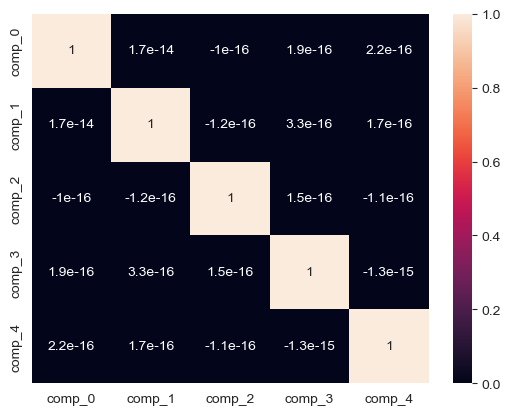

In [8]:
sns.heatmap(pc_scores.corr(), annot = True)

<Axes: >

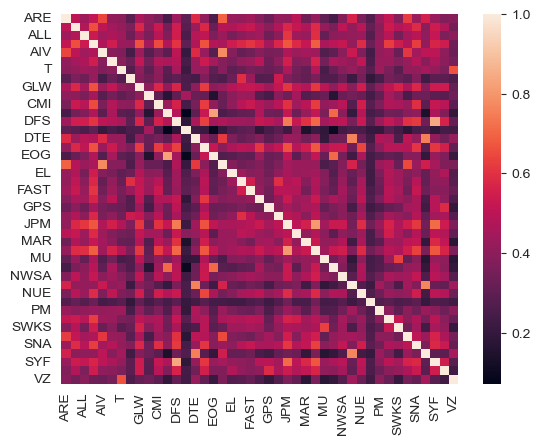

In [9]:
sns.heatmap(ret_stock.corr())

차원 축소된 시계열의 경우 계열관 상관성이 거의 제거가 된 모습을 볼 수 있다. 이는 statsmodel이 모델의 분석에 초점을 두었기 때문에, 최대한 계열 독립적인 factor로 만들어지도록 연산을 수행하기 때문이다

**sklearn**

sklearn의 연산은 statsmodel과 성격이 다른다

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca.fit(ret_stock)

PCA(n_components=5)

In [11]:
pc_scores = pca.transform(ret_stock)

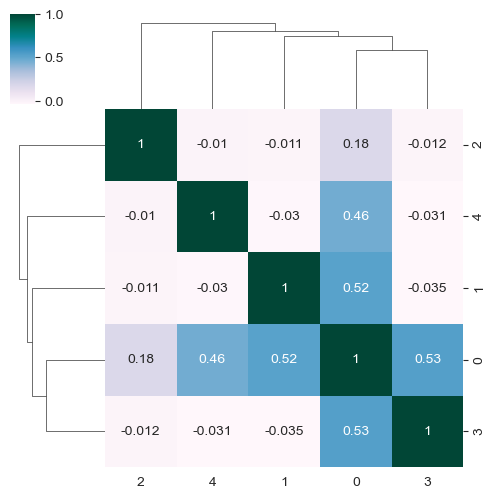

In [12]:
sns.clustermap(np.corrcoef(pca.components_), annot = True, figsize = (5,5), cmap = 'PuBuGn')

<Axes: >

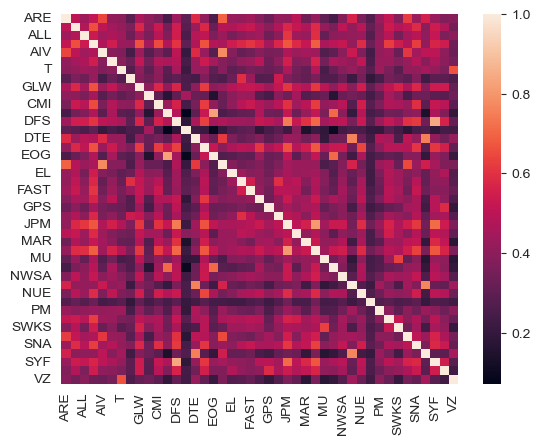

In [13]:
sns.heatmap(ret_stock.corr())

statsmodel의 연산과는 다르게, 축소된 성분 간 상관성이 완전히 제거되지는 않는다. 즉, 분석에 초점을 맞추기 보다 모형의 복잡도 감소를 위한 feature tuning에 초점을 맞췄기 때문이다. 두 모형 모두 해석에 유의해야 하지만, sklaern에서의 PCA는 특히 더욱 설명이 불가능하다

#### 2. K-means Clustering

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" alt="My Image"></center>

Clustering에서 가장 유명한 비지도 학습 알고리즘 중 하나로, 원래 신호 처리 분야에서 나온 벡터 양자화 방법의 일종이다. n개의 관측값을 각 관측값이 가장 가까운 평균(국지적 평균)을 가진 클러스터에 속하는 k개의 클러스터로 분할하여 클러스터의 프로토타입 역할을 하는 것을 목표로 한다

K-Means Clustering에서 목적함수는 PCA와 같이 feature간의 분산을 작게 하는 것으로 지정되어 있지만 거리 척도는 Normal **Euclidean distance가 아니라는 점**을 알아둬야 한다

```
sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, 
                       tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
```

관측 행렬 $(\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n)$가 존재한다고 하자. 여기서 각 관측 벡터는 d차원 실수 벡터이다. k means clustering은 군집 내 분산을 최소화하기 위해 관측치를 $k( \geq n)$집합 $\mathbf{S} = \{S_1, S_2, \dots, S_k\}$로 분할하는 것을 목표로 한다

따라서, 목적함수는 다음과 같이 정의된다

$${\displaystyle \mathop {\operatorname {arg\,min} } _{\mathbf {S} }\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}=\mathop {\operatorname {arg\,min} } _{\mathbf {S} }\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}}$$

여기서 $\mathbf{\mu}_i$는 군집 집합 $S_i$의 국소적 평균으로, 다음과 같이 정의된다

$${\displaystyle {\boldsymbol {\mu _{i}}}={\frac {1}{|S_{i}|}}\sum _{\mathbf {x} \in S_{i}}\mathbf {x} }$$

이는 도일한 군집에 있는 점들의 편차를 최소화하는 문제의 목적과 같다

$${\displaystyle \mathop {\operatorname {arg\,min} } _{\mathbf {S} }\sum _{i=1}^{k}\,{\frac {1}{|S_{i}|}}\,\sum _{\mathbf {x} ,\mathbf {y} \in S_{i}}\left\|\mathbf {x} -\mathbf {y} \right\|^{2}}$$

목적함수가 MSE를 최소화하는 문제로 귀결되는데, 이는 즉 **군집의 MSE를 최소화하는 결정 경계를 찾는 과정**이라고 생각하면 쉽다

**updating step**

clustering의 초기 단계는 다음과 같이 정의된다. 각 군집의 관측치의 nearest mean을 계산한다

$${\displaystyle S_{i}^{(t)}=\left\{x_{p}:\left\|x_{p}-m_{i}^{(t)}\right\|^{2}\leq \left\|x_{p}-m_{j}^{(t)}\right\|^{2}\ \forall j,1\leq j\leq k\right\}}$$

iteration을 추가할 때마다 다음과 같은 연산을 다시 수행한다

$${\displaystyle m_{i}^{(t+1)}={\frac {1}{\left|S_{i}^{(t)}\right|}}\sum _{x_{j}\in S_{i}^{(t)}}x_{j}}$$

#### example 2

example 1에서 가져온 종목 데이터의 공분산에 대해 K means clustering을 수행해 보자. 여기서 n_cluster는 3으로 지정하도록 한다

In [14]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

cov_matrix = ret_stock.cov()

n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(cov_matrix)

labels = kmeans.labels_

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


공분산에 대해 clustering을 수행하였기 때문에, mean-variance 평면에 mapping할 수 있다

Text(0.5, 1.0, 'Mean-variance Clustering')

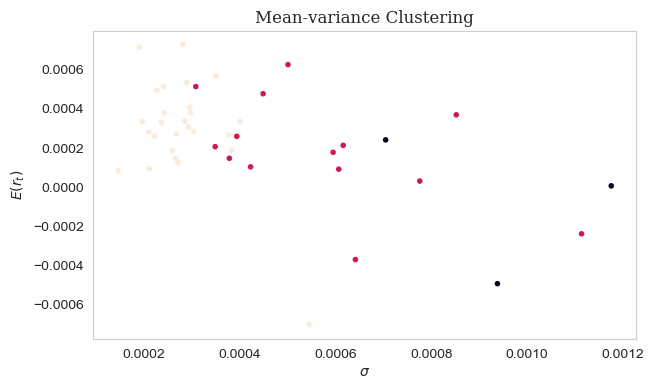

In [15]:
plt.figure(figsize = (7,4))
plt.scatter(ret_stock.var(axis = 0), ret_stock.mean(axis = 0), c = labels, marker = '.')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$E(r_t)$')
plt.grid(False)
plt.title('Mean-variance Clustering', fontsize = 12, fontfamily = 'Serif')

clustering결과, 공분산과 return rate에 따라 군집이 되었다는 것을 확인할 수 있다. 즉, 종목의 공적분 계열이 비슷한것끼리 군집화 되었다고 판단할 수 있다

In [16]:
cluster_labels = pd.DataFrame({'cluster' : labels}, index = ret_stock.columns)
cluster_labels.head()

,cluster
ARE,2
ALLE,2
ALL,2
AME,2
AIV,2


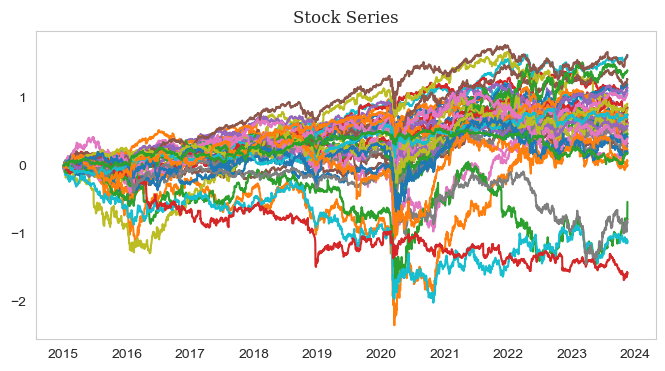

In [17]:
plt.figure(figsize = (8,4))
plt.plot(ret_stock.cumsum())
plt.grid(False)
plt.title('Stock Series', fontsize = 12, fontfamily = 'Serif')
plt.show()

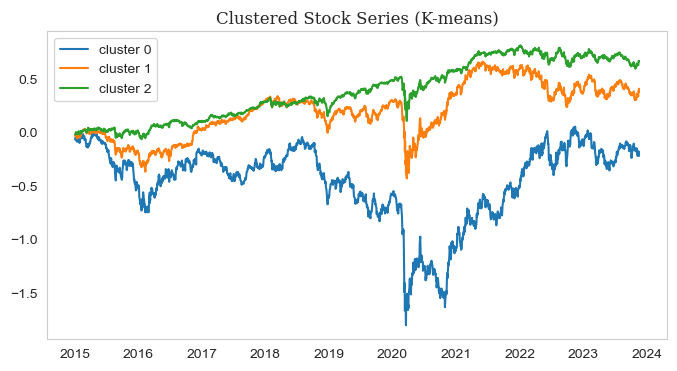

In [18]:
plt.figure(figsize = (8, 4))
for i in range(3) :
    plt.plot(ret_stock.loc[:, cluster_labels[cluster_labels['cluster'] == i].index].mean(axis = 1).cumsum(), label = 'cluster ' + str(i))
plt.grid(False)
plt.legend()
plt.title('Clustered Stock Series (K-means)', fontsize = 12, fontfamily = 'Serif')
plt.show()

#### 3. DBSCAN

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" alt="My Image"></center>

DBSCAN은 1996년 Martin Ester, Hans-Peter Kriegel, Sander, Xiaowei Xu가 제안한 군집화 알고리즘이다. DBSCAN은 밀도 기반으로 추정하는 대표적인 non parametic method이다. 일부 공간에 점들이 집합되어 있을 때, 서로 밀접하게 모여 있는 점들을 그룹화하여 밀도가 낮은 공간에 홀로 놓여 있는 데이터들을 outlier로 가정한다. DBSCAN은 모형이 간단하고 연산 시간 대비 성능이 좋기 때문에, 가장 많이 사용되는 군집화 알고리즘 중 하나이다

```
sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, 
                       algorithm='auto', leaf_size=30, p=None, n_jobs=None)
```

DBSCAN은 다음과 같은 과정을 통해 cluster를 출력한다

```
DBSCAN(DB, distFunc, eps, minPts) {
    C := 0                                                  /* Cluster counter */
    for each point P in database DB {
        if label(P) ≠ undefined then continue               /* Previously processed in inner loop */
        Neighbors N := RangeQuery(DB, distFunc, P, eps)     /* Find neighbors */
        if |N| < minPts then {                              /* Density check */
            label(P) := Noise                               /* Label as Noise */
            continue
        }
        C := C + 1                                          /* next cluster label */
        label(P) := C                                       /* Label initial point */
        SeedSet S := N \ {P}                                /* Neighbors to expand */
        for each point Q in S {                             /* Process every seed point Q */
            if label(Q) = Noise then label(Q) := C          /* Change Noise to border point */
            if label(Q) ≠ undefined then continue           /* Previously processed (e.g., border point) */
            label(Q) := C                                   /* Label neighbor */
            Neighbors N := RangeQuery(DB, distFunc, Q, eps) /* Find neighbors */
            if |N| ≥ minPts then {                          /* Density check (if Q is a core point) */
                S := S ∪ N                                  /* Add new neighbors to seed set */
            }
        }
    }
}
```

**optimization criterion**

DBSCAN의 목적함수는 다음과 같다. $C$는 모든 가능한 군집화 집합 ${\mathcal {C}}$의 부분집합 ${\displaystyle C=\{C_{1},\ldots ,C_{l}\}}$ 이며,군집 내 모든 pair point가 밀도 추정이 가능한 조건에서 군집의 수를 최소화한다

$${\displaystyle \min _{C\subset {\mathcal {C}},~d_{db}(p,q)\leq \varepsilon ~\forall p,q\in C_{i}~\forall C_{i}\in C}|C|}$$

#### example 3

DBSCAN을 이용하여 example 1의 과정을 수행하라. 여기서 eps = 0.0003이고 min_samples = 2로 지정한다

In [19]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

cov_matrix = ret_stock.cov()

dbscan = DBSCAN(eps = 0.0003, min_samples = 2)
clusters = dbscan.fit_predict(cov_matrix)

DBSCAN에서의 parameter eps는 epsilon의 약자로, 샘플들간의 최대 거리를 지정해 주는 parameter이다. 금융 시계열의 distance는 대개 퍼센테이지로 표현되기 때문에 작은 값을 지정해 주어야 한다.
 
min_samples는 cluster_mean을 추정할 때 계산되는 관측치의 개수를 지정해 주는 parameter로, 값이 작을수록 과적합 위험이 높다. 다만, 이 값은 sample의 개수가 몇개인지에 따라 달라질 수 있다

Text(0.5, 1.0, 'Mean-variance Clustering')

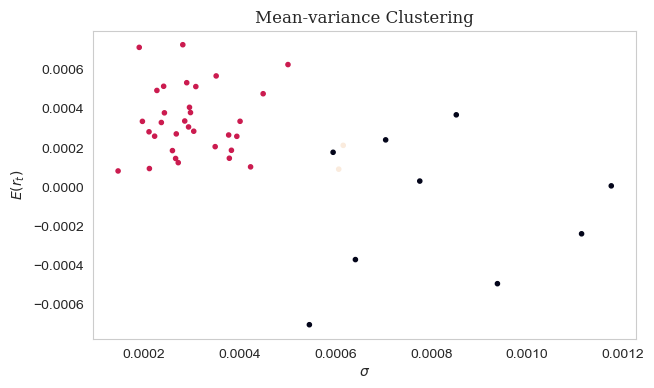

In [20]:
plt.figure(figsize = (7,4))
plt.scatter(ret_stock.var(axis = 0), ret_stock.mean(axis = 0), c = clusters, marker = '.')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$E(r_t)$')
plt.grid(False)
plt.title('Mean-variance Clustering', fontsize = 12, fontfamily = 'Serif')

군집화의 개수를 지정하는 것이 아닌 거리 기준에 따라 최소의 군집으로 추정해 주기 때문에 공통 성분을 가진 군집끼리 분류되는 경향이 크다. 데이터간에 차이가 없을 수록 더 적은 군집으로 추정되고, 계열간 상관성이 작을수록 더 많은 군집으로 최적화한다

자산배분에서는 계열 상관성이 작은 자산끼리 aggregating하기 때문에 clustering이 굉장히 유용한다

In [21]:
cluster_tick = pd.DataFrame({'cluster' : clusters}, index = ret_stock.columns)
cluster_tick.head()

,cluster
ARE,0
ALLE,0
ALL,0
AME,0
AIV,0


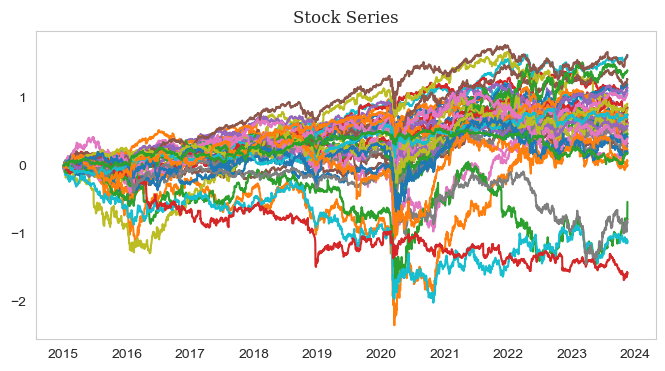

In [22]:
plt.figure(figsize = (8,4))
plt.plot(ret_stock.cumsum())
plt.grid(False)
plt.title('Stock Series', fontsize = 12, fontfamily = 'Serif')
plt.show()

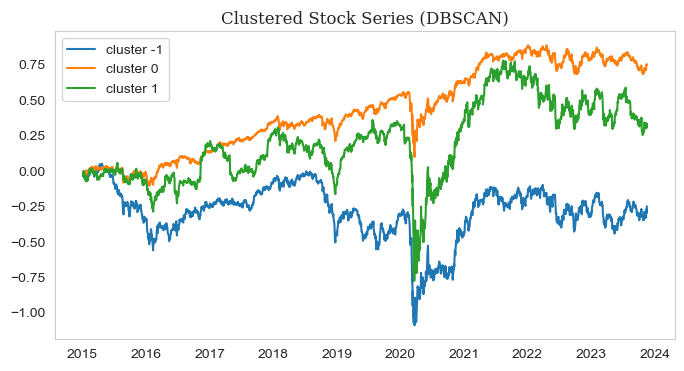

In [23]:
plt.figure(figsize = (8, 4))
for i in range(-1, 2) :
    plt.plot(ret_stock.loc[:, cluster_tick[cluster_tick['cluster'] == i].index].mean(axis = 1).cumsum(), label = 'cluster ' + str(i))
plt.grid(False)
plt.legend()
plt.title('Clustered Stock Series (DBSCAN)', fontsize = 12, fontfamily = 'Serif')
plt.show()

#### 4. Hierarchical Principal Components Analysis

계층적 PCA(Hierarchical PCA)는 대규모 또는 복잡한 데이터 세트를 효과적으로 분석하기 위한 방법이다. 이 접근법은 데이터를 여러 서브셋으로 분할한 후 각 서브셋에 대해 주성분 분석(PCA)을 별도로 수행한다

Subset별로 PCA를 통해 각 서브셋의 주요 패턴과 구조를 추출하며, 이후 이러한 결과를 종합하여 전체 데이터 세트의 특성을 파악한다. 계층적 PCA는 대규모 데이터 세트를 다루는 데 있어 계산상의 부담을 줄이고, 서브셋 간의 다양한 관계나 특성을 더 깊이 이해할 수 있다는 것이 장점이다 이 방법은 복잡한 구조를 가진 데이터 세트를 세분화하여 분석하는 데 특히 유용하며, 금융 분야에서 주로 쓰이고 있다. 그러나 계층적 PCA는 전체 데이터에 대한 일반적인 PCA와 다른 결과를 줄 가능성이 크기 때문에, 분석 결과 해석 시 데이터 분할 방식과 Subset의 특성을 모두 고려해야 한다

계층적 PCA에는 다음과 같은 단계로 이뤄진다

1. 트리 군집화
2. 준 대각화(Quasi-Diagonalization)
3. 재귀적 이분법

4절의 주제는 계층적 군집화를 통해 금융 시계열에서 자산의 배분이 어떻게 이루어지는지 보도록 한다

**4.1 트리 군집화**

관측값 $X$의 $T \times N$행렬을 고려해 보자. 행렬은 $T$기간에 대한 $N$개 변수 계열이다. 이 $N$ 열벡터를 군집의 계층 구조로 병합해 배분을 트리 그래프를 따라 하향식으로 흘러내리고자 한다

첫째, 원소가 $\rho = \{\rho_{i,j}\}_{i,j = 1, \dots, N}$인 $N \times N$ 상관관계 행렬을 계산한다. 여기서 $\rho_{i,j} = \rho [X_i, X_j]$다. 거리 척도는 $d : (X_i, X_j) \subset B \rightarrow \mathbb{R} \in [0,1], d_{i,j} = d[X_i, X_j] = \sqrt{\frac{1}{2}(1 - \rho_{i,j})}$로 정의되며, 여기서 $B = [1,\dots, i, \dots, N]$내의 원소의 카티시안 곱이다. 이는 $N \times N$ 거리 행렬 $D = \{d_{i,j}\}_{i,j = 1, \dots, N}$을 계산할 수 있게 해준다. 행렬 $D$는 다음과 같은 성질을 갖는다

$$d[x, y] \geq 0$$
$$d[x,y] = 0 \Leftrightarrow X = Y$$
$$d[x,y] = d[Y,X]$$
$$d[X,Z] \geq d[x,y] + d[Y,Z]$$

따라서, 행렬 $D$는 적절한 거리 공간이라고 할 수 있다

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

correlation = ret_stock.corr()
distances = np.sqrt((1 - correlation) / 2)
clusters = linkage(squareform(distances), method = "single")

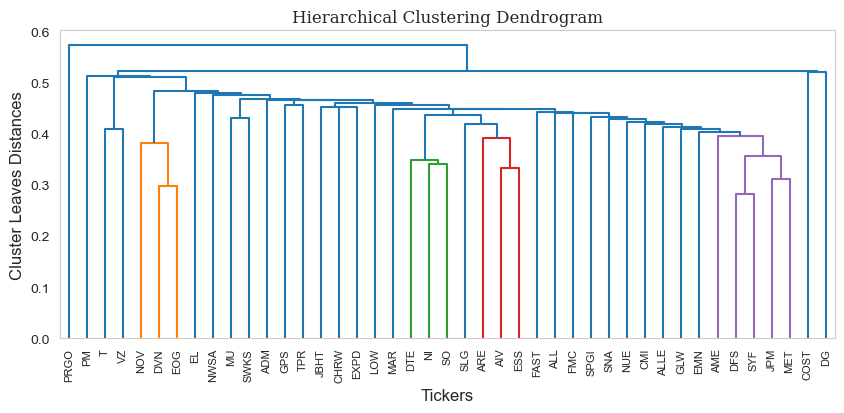

In [25]:
columns = ret_stock.columns
plt.figure(figsize = (10, 4))
dendrogram(clusters, labels=columns)
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Cluster Leaves Distances', fontsize=12)
plt.grid(False)
plt.title('Hierarchical Clustering Dendrogram', fontsize = 12, fontfamily = 'Serif')
plt.show()

위 Dendogram은 Tree 군집화의 예를 보여주고 있다. 거리는 $\sqrt{\frac{1}{2}(1 - \rho_{i,j})}$로 정의되었음을 유의하자

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_23016/3755362694.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


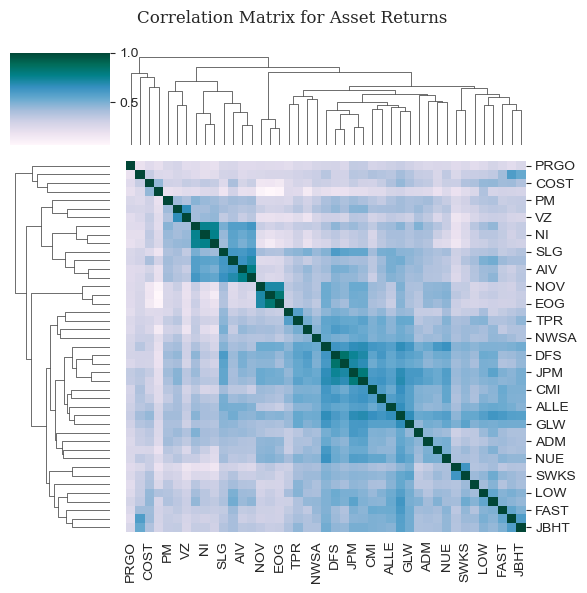

In [26]:
g = sns.clustermap(correlation, figsize = (6, 6), cmap = 'PuBuGn')
g.fig.suptitle('Correlation Matrix for Asset Returns', fontsize=12, fontfamily='Serif')
plt.tight_layout()
plt.show()

seaborn의 clustermap을 이용하면 간단하게 트리 군집화의 heatmap을 볼 수 있다

**4.2 준 대각화**

이 단계는 공분산 행렬의 행과 열을 재구성해 가장 큰 값이 대각선에 위치하게 한다. 공분산의 준대각화는 유용한 속성이다

유사한 금융 상품은 함께 배치되고 다른 상품은 서로 떨어뜨리도록 배치한다. 알고리즘은 아래의 코드와 같이 작동하는데, 연결 행렬의 각 행이 두 branch를 하나로 합친다는 것을 알고 있다. 가지 내의 군집들을 그 구성 성분으로 재귀적으로 교체하여, 군집이 더이상 남지 않을 때까지 반복한다. 이런 교체는 군집화의 순서를 유지하게 하는데, 출력은 군집화되지 않은 원소의 정렬된 리스트이다. 아래의 예제를 통해 준 대각화에 대해서 간단히 살펴보자

In [27]:
def QuasiDiag(link: np.ndarray) -> list:
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]    # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)    # make space
        df0 = sortIx[sortIx >= numItems]    # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]    # item 1
        df0 = pd.Series(link[j, 1], index=i+1)
        sortIx = pd.concat([sortIx, df0])    # item 2
        sortIx = sortIx.sort_index()    # re-sort
        sortIx.index = range(sortIx.shape[0])    # re-index
    lst =  sortIx.tolist()
    return lst

In [28]:
print(QuasiDiag(clusters)) # 준 대각화된 성분의 index

[33, 34, 6, 42, 29, 11, 16, 18, 30, 28, 36, 5, 22, 41, 23, 7, 19, 25, 26, 14, 31, 39, 37, 0, 4, 17, 20, 2, 21, 35, 38, 32, 10, 1, 8, 15, 3, 12, 40, 24, 27, 9, 13]


**4.3 재귀적 이분법**

4.2를 통해 준대각 행렬을 얻었다. 역분산 배분은 대각 공분산 행렬에 대해 최적이다. 이 사실들로부터 두 가지 활용이 가능하다

1. 상향식 : 연속된 부분 집합의 분산을 역분산 배분의 분산으로 정의한다
2. 하향식 : 인접한 부분 집합 간의 배분을 이들의 총 분산에 역으로 비례하도록 분할한다. 아래의 알고리즘은 하향식 아이디어를 공식화한다

In [29]:
def InversePortfolio(cov, **kargs) : 
    ivp = 1 / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

def ClusterVar(cov, cItems) :
    cov_ = pd.DataFrame(cov).loc[cItems, cItems] # 행렬 분할
    w_ = InversePortfolio(cov_).reshape(-1, 1)
    cVar = np.dot(np.dot(w_.T, cov_), w_)[0, 0]
    return cVar

def RecBipart(cov: np.ndarray, sortIx: list) -> pd.Series:
    w = pd.Series([1] * len(sortIx), index=sortIx)
    cItems = [sortIx]    # 모든 아이템을 하나의 군집으로 초기화
    while len(cItems) > 0:
        cItems = [i[int(j): int(k)] for i in cItems
                  for j, k in ((0, len(i) / 2), (len(i) / 2, len(i))) if len(i) > 1]    # bi-section
        for i in range(0, len(cItems), 2):    # parse in pairs
            cItems0 = cItems[i]    # cluster 1
            cItems1 = cItems[i+1]    # cluster 2
            cVar0 = ClusterVar(cov, cItems0)
            cVar1 = ClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha    # weight 1
            w[cItems1] *= 1 - alpha    # weight 2
    return w

In [30]:
Ix = QuasiDiag(clusters)
weights = RecBipart(ret_stock.cov().values, Ix)
weights

33    0.024128
34    0.059193
6     0.046489
42    0.059139
29    0.009206
11    0.008265
16    0.013790
18    0.031396
30    0.022438
28    0.010076
36    0.017041
5     0.037900
22    0.008996
41    0.009133
23    0.023847
7     0.036167
19    0.028473
25    0.018430
26    0.025969
14    0.031520
31    0.028088
39    0.046246
37    0.014185
0     0.027307
4     0.010027
17    0.014792
20    0.029377
2     0.024553
21    0.014101
35    0.029249
38    0.018223
32    0.010738
10    0.024604
1     0.025290
8     0.019162
15    0.010723
3     0.016822
12    0.011667
40    0.007077
24    0.013926
27    0.024681
9     0.035413
13    0.022154
dtype: float64

In [31]:
ret_stock.iloc[:, weights.index].columns

Index(['PRGO', 'PM', 'T', 'VZ', 'NOV', 'DVN', 'EOG', 'EL', 'NWSA', 'MU',
       'SWKS', 'ADM', 'GPS', 'TPR', 'JBHT', 'CHRW', 'EXPD', 'LOW', 'MAR',
       'DTE', 'NI', 'SO', 'SLG', 'ARE', 'AIV', 'ESS', 'FAST', 'ALL', 'FMC',
       'SPGI', 'SNA', 'NUE', 'CMI', 'ALLE', 'GLW', 'EMN', 'AME', 'DFS', 'SYF',
       'JPM', 'MET', 'COST', 'DG'],
      dtype='object')

Text(0.5, 1.0, 'Portfolio weight with Inverse PCA Portfolio')

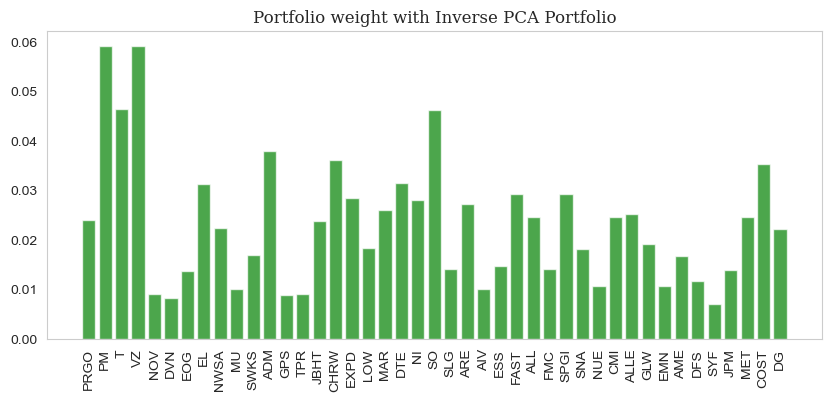

In [32]:
plt.figure(figsize = (10,4))
plt.bar(ret_stock.iloc[:, weights.index].columns, weights, color = 'green', alpha = 0.7)
plt.grid(False)
plt.xticks(rotation = 90)
plt.title("Portfolio weight with Inverse PCA Portfolio", fontsize = 12, fontfamily = 'Serif')

**Inverse Portfolio를 사용한 계층적 군집화는 전통적 배분과 무엇이 다를까?**

우선, feature의 개수가 많아질수록 Matrix에서 역행렬이 성립되지 않는 경우를 미리 방지할 수 있어 안정적이다

둘째로, 전통적 포트폴리오 이론에 비해 좀 더 효율적인 배분 가중치를 계산해낼 수 있다

자산군의 개수가 많아지고 편입종목이 늘어남에 따라 공분산 불량조건에 대한 문제도 불거졌다. 계층적 군집화를 통한 자산 배분은 좀 더 안정적인 포트폴리오를 구성하는데 도움이 된다